## 인공지능 과제
### 학번: 201533812 이름: 이상민
### 제출일: 2020년 06월 22일(토)
---

# <center> 5.4	Visualizing what convnets learn </center>
> 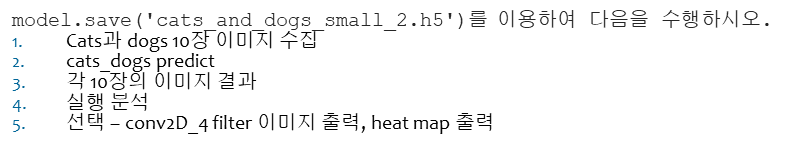

In [5]:
import keras
import os, shutil
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

# 고양이 이미지

./datasets/pictures/cats/cat_01.jpg


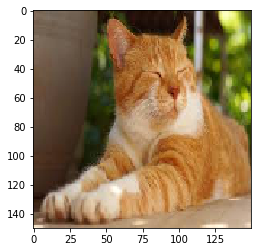

./datasets/pictures/cats/cat_02.jpg


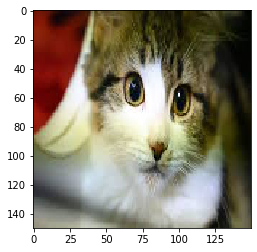

./datasets/pictures/cats/cat_03.jpg


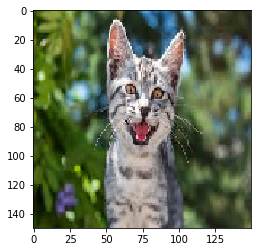

./datasets/pictures/cats/cat_04.jpg


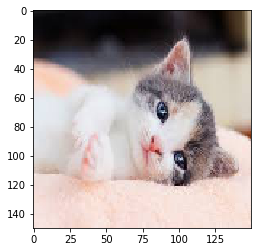

./datasets/pictures/cats/cat_05.jpg


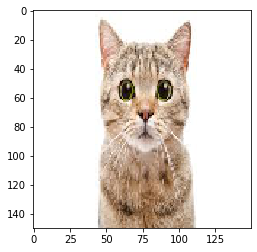

./datasets/pictures/cats/cat_06.jpg


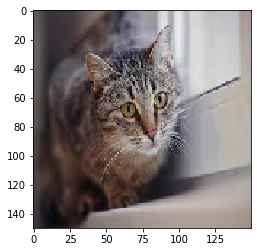

./datasets/pictures/cats/cat_07.jpg


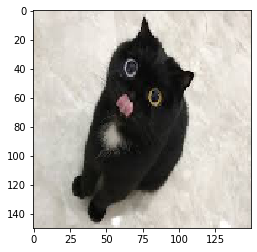

./datasets/pictures/cats/cat_08.jpg


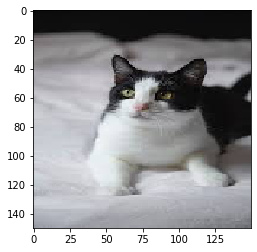

./datasets/pictures/cats/cat_09.jpg


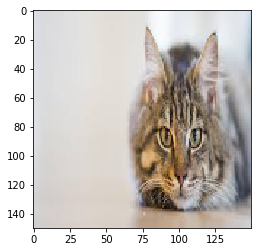

./datasets/pictures/cats/cat_10.jpg


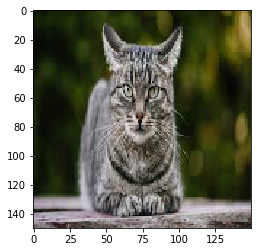

In [131]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
from keras import models

cat_image_list = []
cat_image_tensor_list = []

dog_image_list = []

dir_path = './datasets/pictures/'
cat_img_path = dir_path + 'cats/cat_'
dog_img_path = dir_path + 'dogs/dog_'


layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)


# 이미지가 10개이므로, 반복횟수를 10으로 지정.
# 이미지의 개수가 가변하다면, 변수는 바꾸어 지정해야 함.
for i in range(1, 11):
    
    img_num = "{0:02d}".format(i)
    img_path = cat_img_path + img_num + '.jpg'
    print(img_path)
    
    # cat image path를 리스트에 저장.
    # dog image path도 같이 저장한다.
    cat_image_list.append(img_path)
    dog_path = dog_img_path + img_num + '.jpg'
    dog_image_list.append(dog_path)
        
    img = image.load_img(img_path, target_size=(150,150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    
    # 계산한 이미지 텐서를 리스트에 저장.
    cat_image_tensor_list.append(img_tensor)
    
    plt.imshow(img_tensor[0])
    plt.show()
    

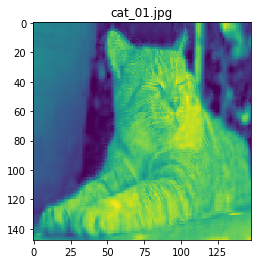

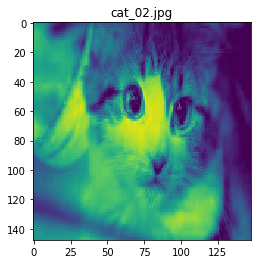

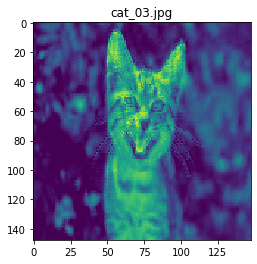

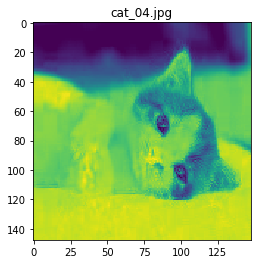

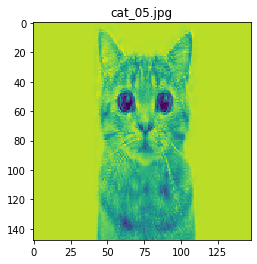

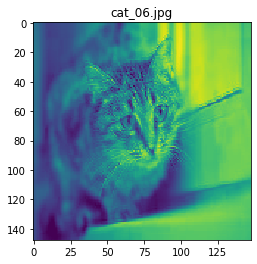

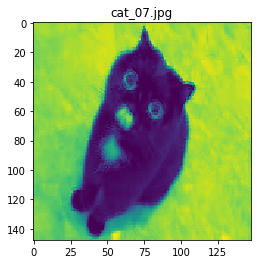

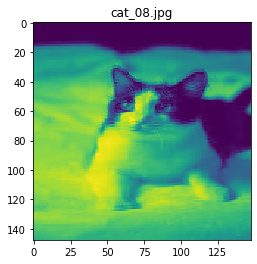

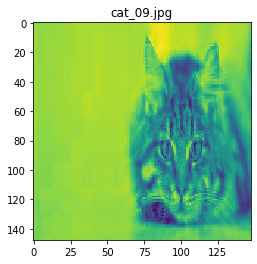

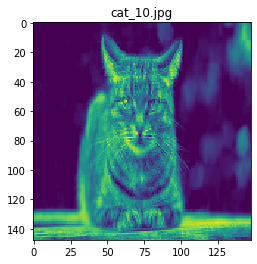

In [107]:
for index, item in enumerate(cat_image_tensor_list):
    activations = activation_model.predict(item)


    ax = plt.subplots()
    plt.title(cat_image_list[index][-10:])
    plt.imshow(activations[0][0, :, :, 18], cmap='viridis')

In [ ]:
from keras.preprocessing import image
import numpy as np

cat_results = []
for img_path in cat_image_list:
    # 150 x 150 크기의 파이썬 이미징 라이브러리(PIL) 객체로 반환됩니다
    img = image.load_img(img_path, target_size=(150, 150))

    # (150, 150, 3) 크기의 넘파이 float32 배열
    x = image.img_to_array(img)
    
    # 차원을 추가하여 (1, 150, 150, 3) 크기의 배치로 배열을 변환합니다
    x = np.expand_dims(x, axis=0)

    # 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
    x = x / 255.

    preds = model.predict(x)
    
    cat_results.append(preds)
    
dog_results = []
for img_path in dog_image_list:
    # 150 x 150 크기의 파이썬 이미징 라이브러리(PIL) 객체로 반환됩니다
    img = image.load_img(img_path, target_size=(150, 150))

    # (150, 150, 3) 크기의 넘파이 float32 배열
    x = image.img_to_array(img)

    # 차원을 추가하여 (1, 150, 150, 3) 크기의 배치로 배열을 변환합니다
    x = np.expand_dims(x, axis=0)

    # 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
    x = x / 255.
    
    preds = model.predict(x)
    
    dog_results.append(preds)


cat_results = [float(i) for i in cat_results]
dog_results = [float(i) for i in dog_results]

plt.plot([i for i in range(1, 11)], cat_results)
plt.plot([i for i in range(1, 11)], dog_results, 'r')
plt.xlabel("Count")
plt.ylabel("Accuracy")
plt.legend(['Cat', 'Dog'])
plt.show()

In [113]:
from keras.applications import VGG16
from keras import backend as K

layer_name = 'conv2d_8'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [114]:
# gradients 함수가 반환하는 텐서 리스트(여기에서는 크기가 1인 리스트)에서 첫 번째 텐서를 추출합니다
grads = K.gradients(loss, model.input)[0]

# 0 나눗셈을 방지하기 위해 1e–5을 더합니다
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

iterate = K.function([model.input], [loss, grads])

# 테스트:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

# 잡음이 섞인 회색 이미지로 시작합니다
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# 업데이트할 그래디언트의 크기
step = 1.
for i in range(40):   # 경사 상승법을 40회 실행합니다
    # 손실과 그래디언트를 계산합니다
    loss_value, grads_value = iterate([input_img_data])
    # 손실을 최대화하는 방향으로 입력 이미지를 수정합니다
    input_img_data += grads_value * step

def deprocess_image(x):
    # 텐서의 평균이 0, 표준 편차가 0.1이 되도록 정규화합니다
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # [0, 1]로 클리핑합니다
    x += 0.5
    x = np.clip(x, 0, 1)

    # RGB 배열로 변환합니다
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def generate_pattern(layer_name, filter_index, size=150):
    # 주어진 층과 필터의 활성화를 최대화하기 위한 손실 함수를 정의합니다
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # 손실에 대한 입력 이미지의 그래디언트를 계산합니다
    grads = K.gradients(loss, model.input)[0]

    # 그래디언트 정규화
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # 입력 이미지에 대한 손실과 그래디언트를 반환합니다
    iterate = K.function([model.input], [loss, grads])
    
    # 잡음이 섞인 회색 이미지로 시작합니다
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # 경사 상승법을 40 단계 실행합니다
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

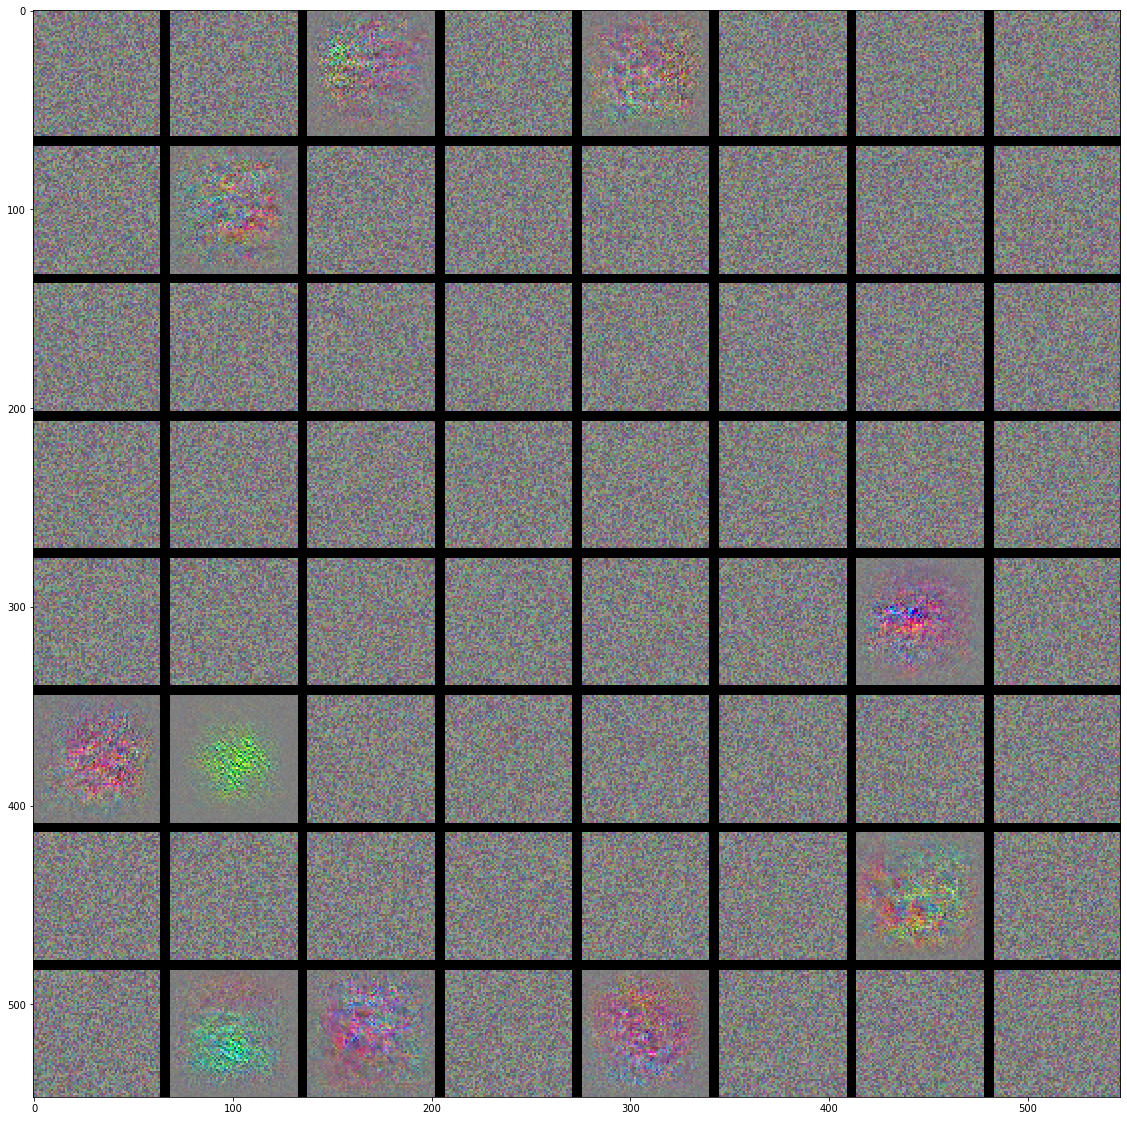

In [116]:
layer_name = 'conv2d_8'
size = 64
margin = 5

# 결과를 담을 빈 (검은) 이미지
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3), dtype='uint8')
for i in range(8):  # results 그리드의 행을 반복합니다
    for j in range(8):  # results 그리드의 열을 반복합니다
        # layer_name에 있는 i + (j * 8)번째 필터에 대한 패턴 생성합니다
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

        # results 그리드의 (i, j) 번째 위치에 저장합니다
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

# results 그리드를 그립니다
plt.figure(figsize=(20, 20))
plt.imshow(results)
plt.show()

In [193]:
from keras.applications.vgg16 import VGG16

K.clear_session()

# 이전 모든 예제에서는 최상단의 완전 연결 분류기를 제외했지만 여기서는 포함합니다
model = VGG16(weights='imagenet')

In [194]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# 이미지 경로
img_path = './datasets/pictures/cats/cat_02.jpg'

# 224 × 224 크기의 파이썬 이미징 라이브러리(PIL) 객체로 반환됩니다
img = image.load_img(img_path, target_size=(224, 224))

# (224, 224, 3) 크기의 넘파이 float32 배열
x = image.img_to_array(img)

# 차원을 추가하여 (1, 224, 224, 3) 크기의 배치로 배열을 변환합니다
x = np.expand_dims(x, axis=0)

# 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
x = preprocess_input(x)

In [195]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02123045', 'tabby', 0.46250737), ('n02123159', 'tiger_cat', 0.1880313), ('n02124075', 'Egyptian_cat', 0.16649488)]


In [196]:
np.argmax(preds[0])

281

In [197]:
# 예측 벡터의 '아프리카 코끼리' 항목
african_elephant_output = model.output[:, 281]

# VGG16의 마지막 합성곱 층인 block5_conv3 층의 특성 맵
last_conv_layer = model.get_layer('block5_conv3')

# block5_conv3의 특성 맵 출력에 대한 '아프리카 코끼리' 클래스의 그래디언트
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# 특성 맵 채널별 그래디언트 평균 값이 담긴 (512,) 크기의 벡터
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# 샘플 이미지가 주어졌을 때 방금 전 정의한 pooled_grads와 block5_conv3의 특성 맵 출력을 구합니다
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

# 두 마리 코끼리가 있는 샘플 이미지를 주입하고 두 개의 넘파이 배열을 얻습니다
pooled_grads_value, conv_layer_output_value = iterate([x])

# "아프리카 코끼리" 클래스에 대한 "채널의 중요도"를 특성 맵 배열의 채널에 곱합니다
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# 만들어진 특성 맵에서 채널 축을 따라 평균한 값이 클래스 활성화의 히트맵입니다
heatmap = np.mean(conv_layer_output_value, axis=-1)

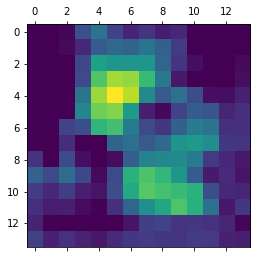

In [198]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [199]:
import cv2

# cv2 모듈을 사용해 원본 이미지를 로드합니다
img = cv2.imread(img_path)

# heatmap을 원본 이미지 크기에 맞게 변경합니다
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# heatmap을 RGB 포맷으로 변환합니다
heatmap = np.uint8(255 * heatmap)

# 히트맵으로 변환합니다
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# 0.4는 히트맵의 강도입니다
superimposed_img = heatmap * 0.4 + img

# 디스크에 이미지를 저장합니다
cv2.imwrite('./datasets/cat_cam.jpg', superimposed_img)

True

In [149]:
model = load_model('cats_and_dogs_small_2.h5')

In [191]:
from keras.preprocessing import image
import numpy as np

cat_results = []
for img_path in cat_image_list:
    # 150 x 150 크기의 파이썬 이미징 라이브러리(PIL) 객체로 반환됩니다
    img = image.load_img(img_path, target_size=(150, 150))

    # (150, 150, 3) 크기의 넘파이 float32 배열
    x = image.img_to_array(img)
    
    # 차원을 추가하여 (1, 150, 150, 3) 크기의 배치로 배열을 변환합니다
    x = np.expand_dims(x, axis=0)

    # 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
    x = x / 255.

    preds = model.predict(x)
    
    cat_results.append(preds)
    
dog_results = []
for img_path in dog_image_list:
    # 150 x 150 크기의 파이썬 이미징 라이브러리(PIL) 객체로 반환됩니다
    img = image.load_img(img_path, target_size=(150, 150))

    # (150, 150, 3) 크기의 넘파이 float32 배열
    x = image.img_to_array(img)

    # 차원을 추가하여 (1, 150, 150, 3) 크기의 배치로 배열을 변환합니다
    x = np.expand_dims(x, axis=0)

    # 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
    x = x / 255.
    
    preds = model.predict(x)
    
    dog_results.append(preds)


cat_results = [float(i) for i in cat_results]
dog_results = [float(i) for i in dog_results]

plt.plot([i for i in range(1, 11)], cat_results)
plt.plot([i for i in range(1, 11)], dog_results, 'r')
plt.xlabel("Count")
plt.ylabel("Accuracy")
plt.legend(['Cat', 'Dog'])
plt.show()

# 정확도 시각화

그래프를 분석해봤을 때,  
`0 = 고양이`  
`1 = 개`  
라는 것을 알 수 있다.  
또한, 고양이에 대한 정확도는 매우 낮다는 것을 알 수 있다.